# Electric Vechicle sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
df = pd.read_csv(r'C:\Users\HP\Downloads\Electric Vehicle Sales by State in India.csv')
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


## Data Preparation and Cleaning

In [3]:
df.shape

(96845, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [4]:
df.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [5]:
df.nunique()

Year                   11
Month_Name             12
Date                  121
State                  34
Vehicle_Class          73
Vehicle_Category        5
Vehicle_Type           12
EV_Sales_Quantity    1447
dtype: int64

In [5]:
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['Year'] = df['Year'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  int64  
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 5.9+ MB


# Data Exploration

### count of vehicles in different category

In [13]:
vc = df['Vehicle_Category'].value_counts()
vc

Vehicle_Category
Others        54423
2-Wheelers    13121
3-Wheelers    11491
Bus            9119
4-Wheelers     8691
Name: count, dtype: int64

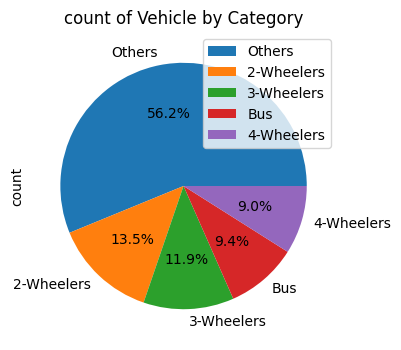

In [16]:
vc.plot(kind= "pie", figsize = (5,4), autopct = "%1.1f%%")

plt.title("count of Vehicle by Category")
plt.legend(labels = vc.index)
plt.show()         
         

### Sales Contribution by Category

In [6]:
vc_sales = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum()
vc_sales

Vehicle_Category
2-Wheelers    1808105.0
3-Wheelers    1620310.0
4-Wheelers     149775.0
Bus              7009.0
Others           8612.0
Name: EV_Sales_Quantity, dtype: float64

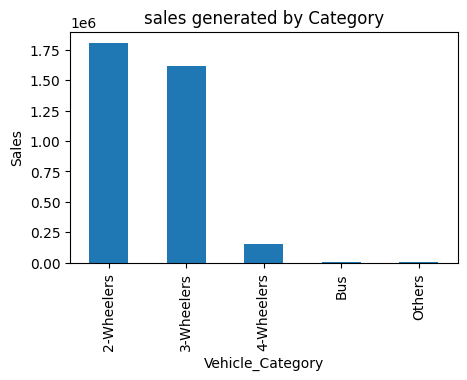

In [7]:
vc_sales.plot(kind = "bar", figsize = (5,3))
plt.title("sales generated by Category")
plt.ylabel("Sales")
plt.show()

### Sales Contribution by State

In [7]:
st_sales = df.groupby('State')['EV_Sales_Quantity'].sum()
st_sales

State
Andaman & Nicobar Island       202.0
Andhra Pradesh               77356.0
Arunachal Pradesh               40.0
Assam                       151917.0
Bihar                       213465.0
Chandigarh                   11453.0
Chhattisgarh                 75275.0
DNH and DD                     431.0
Delhi                       268538.0
Goa                          17382.0
Gujarat                     176713.0
Haryana                      85250.0
Himachal Pradesh              2886.0
Jammu and Kashmir            16840.0
Jharkhand                    47871.0
Karnataka                   315498.0
Kerala                      133246.0
Ladakh                          88.0
Madhya Pradesh              133182.0
Maharashtra                 401535.0
Manipur                       1284.0
Meghalaya                      208.0
Mizoram                        235.0
Nagaland                        52.0
Odisha                       86823.0
Puducherry                    5139.0
Punjab                       492

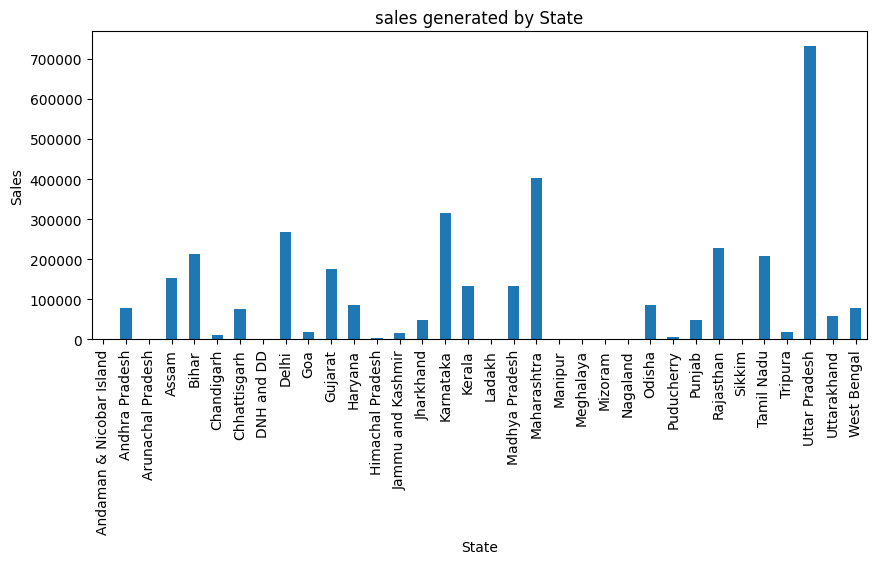

In [8]:
st_sales.plot(kind = "bar", figsize = (10,4))
plt.title("sales generated by State")
plt.ylabel("Sales")
plt.show()

### Sales by Month

In [10]:
mn_sales = df.groupby('Month_Name')['EV_Sales_Quantity'].sum()
mn_sales

Month_Name
apr    232194.0
aug    294022.0
dec    364558.0
feb    228739.0
jan    360703.0
jul    270473.0
jun    229754.0
mar    299888.0
may    262747.0
nov    382217.0
oct    355083.0
sep    313433.0
Name: EV_Sales_Quantity, dtype: float64

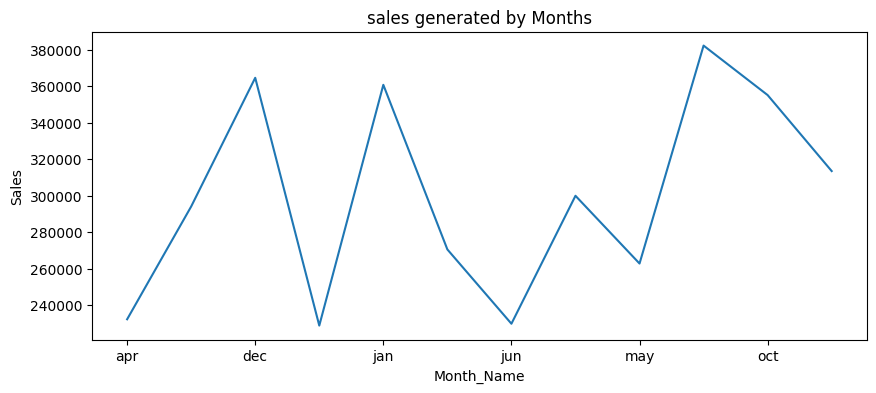

In [11]:
mn_sales.plot(kind = "line", figsize = (10,4))
plt.title("sales generated by Months")
plt.ylabel("Sales")
plt.show()

### Sales generated by Year

In [14]:
yr_sales = df.groupby('Year')['EV_Sales_Quantity'].sum()
yr_sales

Year
2014       2392.0
2015       7805.0
2016      49855.0
2017      87420.0
2018     130254.0
2019     166819.0
2020     124684.0
2021     331498.0
2022    1024723.0
2023    1525179.0
2024     143182.0
Name: EV_Sales_Quantity, dtype: float64

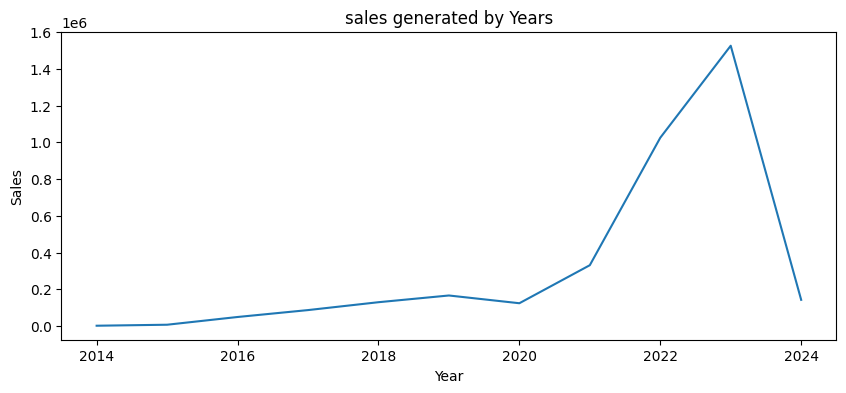

In [15]:
yr_sales.plot(kind = "line", figsize = (10,4))
plt.title("sales generated by Years")
plt.ylabel("Sales")
plt.show()

### Sales Generated  by Vehicle Type

In [16]:
vt_sales = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum()
vt_sales

Vehicle_Type
2W_Personal           1796340.0
2W_Shared               11765.0
3W_Goods                44974.0
3W_Goods_LowSpeed       90656.0
3W_Personal               421.0
3W_Shared               76132.0
3W_Shared_LowSpeed    1408127.0
4W_Personal            130676.0
4W_Shared               19099.0
Bus                      7009.0
Institution Bus             0.0
Others                   8612.0
Name: EV_Sales_Quantity, dtype: float64

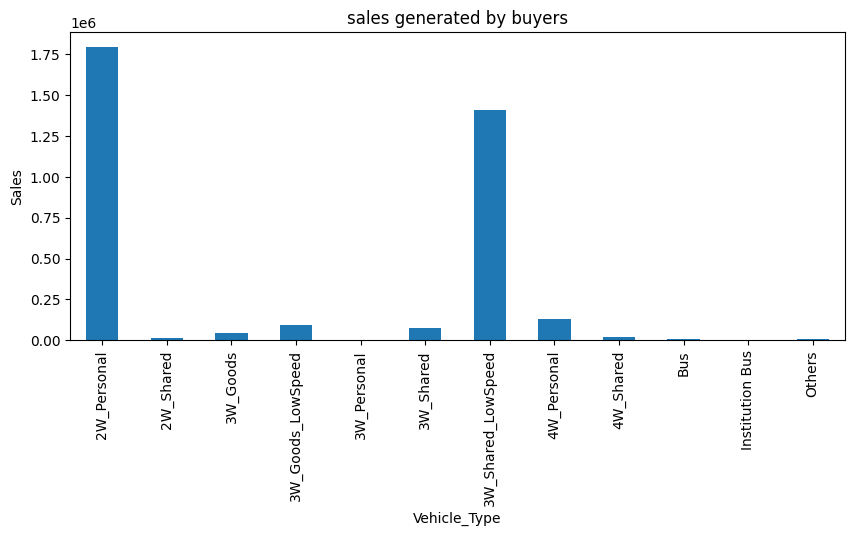

In [17]:
vt_sales.plot(kind = "bar", figsize = (10,4))
plt.title("sales generated by buyers")
plt.ylabel("Sales")
plt.show()

# Insight:

1.A significant number of vehicles are categorized under the "Other" segment. 

2.The 2-wheeler category accounts for the highest sales, underscoring its popularity as a preferred mode of transportation, likely due to affordability, ease of use, and adaptability for personal use.

3.Uttar Pradesh and Maharashtra lead in EV sales, showcasing strong demand in these states. This could be attributed to factors like population density, urbanization, and state-level EV incentives.

4.November records the highest sales volume, likely influenced by festive seasons, year-end discounts, or government policies promoting EV adoption during this time.

5.The year 2023 witnessed the most significant growth in sales, reflecting increased consumer awareness, improved EV infrastructure, and aggressive marketing campaigns by manufacturers.

6.The majority of sales come from 2-wheeler personal vehicles, reinforcing their utility as an efficient and economical transportation option for individual consumers.